In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import csv
from scipy.optimize import minimize
from matplotlib import cm

This is a simple data set to illustrate the Perceptron Learning Model. 

Consider the following training data with two categories (labels):
$$C_1(1) : (0,1.5)^T , (1,1)^T , (2,2)^T , (2,0)^T$$
$$C_2(−1) : (0, 0)^T , (1, 0)^T , (0, 1)^T$$
That is, there are seven data points, each data point has two features and a corresponding label. The data is plotted on the $(x_1,x_2)$ plane. 

Text(0.5, 1.0, 'Scatter-plot of the Data')

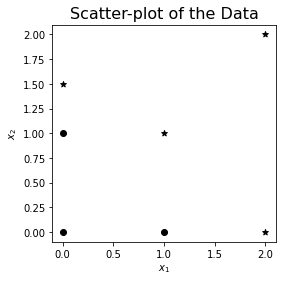

In [17]:
# Data #
# one data point = the row [x_1, x_2, label] in matrix C
C = np.array([[0,1.5,1],[1,1,1],[2,2,1],[2,0,1],[0,0,-1],[1,0,-1],[0,1,-1]]) 
label = C[:,2]

# Plot the data #
fig = plt.figure(figsize=(4,4))

plt.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
plt.scatter(C[label==-1,0],C[label==-1,1],marker = "o",color ='k')

# Generate plot #
axes = plt.gca()
axes.set_ylim([-0.1,2.1])
axes.set_xlim([-0.1,2.1])
axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')
plt.title('Scatter-plot of the Data', fontsize = 16)


After plotting these data points on the $(x_1,x_2)$ plane, observe the data is separable (i.e. there is a hyper-surface separating the two categories of data). In this case the hyper-surface is a line, which can be described by:
	$$w^T x = 0 $$
where $w^T = [w_0, w_1, w_2]$ and $x = [1, x_1,x_2]^T$. That is to say, one coordinate in x is artificial. 

As an initial guess for the separating line, we start with the weight 
    $$w = [-2,4,1]^T $$
and plot the line $w^T x = 0$. Note, this linear model does not separate all data points. Using the Perceptron Learning Algorithm, we must update the weights so that the linear model will eventually separate all seven data points. 

Text(0.5, 1.0, 'Scatter-plot of the Data')

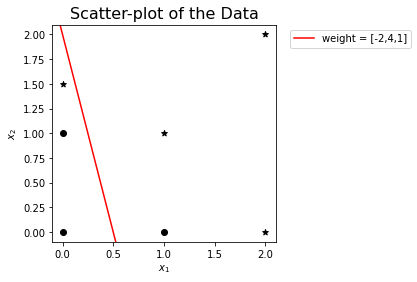

In [19]:
# Plot the initial hyperplane #
fig = plt.figure(figsize=(4,4))
x = np.linspace(-0.1,2.1,100)
w = np.array([-2,4,1])
y = (-w[0] - w[1] * x)/w[2]
plt.plot(x, y, '-r', label='weight = [-2,4,1]')

# Plot the data points #
plt.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
plt.scatter(C[label==-1,0],C[label==-1,1],marker = "o",color ='k')

# Generate plot #
axes = plt.gca()
axes.set_ylim([-0.1,2.1])
axes.set_xlim([-0.1,2.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')
plt.title('Scatter-plot of the Data', fontsize = 16)

Note, the line above does not separate all data points. Using the Perceptron Learning Algorithm, we must update the weights so that the linear model will eventually separate all seven data points. The following functions perform the algorithm and work in the following way:

   On the first EPOCH, we'll move down the list of points, and whenever we hit a point that is mis-classified we update our weight using the equation:
	$$w_{new} = w_{old} + \gamma\big(label(i) - sign(w_{old}^T  x(i))\big)x(i)$$
   where $\gamma$ = 'learning-rate' (a constant), $x(i)$ is the mis-classified point, and $label(i)$ = label of $x(i)$ (either 1 or -1). 

   We'll then continue down the list of points, updating if necessary. Once we reach the end of the list we'll go back to the beginning of the list, starting the second EPOCH. We may stop returning to the beginning of the list when we either reach the pre-set EPOCH value, or when we make a full run-through of the points and no updates of w are needed.

w_old = 1x3 weight vector

data = 7x3 matrix. 1st column is 1's, 2nd and 3rd columns are (x_1,x_2) coordinates

label = 7x1 column. 1 for Class 1(star), -1 for Class 2(dot).

gamma = learning rate (0<gamma<1)

EPOCH = # of cycles through the data points

In [84]:
def w_fit2a(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    c = 0 # counts number of times weight changes
    # start the graph
    fig = plt.figure(figsize=(4,4))
    x = np.linspace(-0.1,2.1,100)
    plt.xlim([-0.1, 2.1])
    plt.scatter(data[label==1,1],data[label==1,2],marker = "*",color = 'k')
    plt.scatter(data[label==-1,1],data[label==-1,2],marker = "o",color ='k')
    y = (-w_old[0] - w_old[1] * x)/w_old[2]
    plt.plot(x, y, '-r', label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_old[0],w_old[1],w_old[2]))
    cmap = plt.get_cmap('rainbow_r')
    colors = [cmap(i) for i in np.linspace(0.1, 1.2, N * EPOCH)]
    for j in range(EPOCH):
        k=0 # stops us once we reach separation of data
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]: # label is incorrect - adjust towards data[i,:]
                w_new = w_old + gamma * (label[i] - M[i]) * data[i,:]
                w_old = w_new
                # draw new line on graph
                y = (- w_new[0] - (w_new[1]*x))/w_new[2]
                plt.plot(x, y, color = colors[int(EPOCH/2*c)], label='w= [{0:.2f},{1:.2f},{2:.2f}]'.format(w_new[0],w_new[1],w_new[2]))
                plt.ylim([-0.1, 2.1])
                plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
                plt.title('Learning Rate = {0:.2f}'.format(gamma))
                # update counters
                k=0
                c=c+1
            else: # label is correct - no need to adjust w
                k=k+1
        if k==N:
            print('Separation achieved! It took', j, 'cycles')
            return w_old, j
        if (k<N and j+1==EPOCH):
            print('EPOCH attained. See if seperation occurs.')
            return w_old
    plt.show()
    
def w_fit3(w_old, data, label, gamma, EPOCH):
    N = np.shape(data)[0]
    M = np.zeros((N,1))
    c = 0 # counts number of times weight changes
    for j in range(EPOCH):
        k=0 # stops us once we reach separation of data
        for i in range(N):
            M[i] = np.sign(w_old @ np.transpose(data[i,:]))
            if M[i] != label[i]: # label is incorrect - adjust towards data[i,:]
                #print('Adjusting to', data[i,1:3])
                w_new = w_old + gamma * (label[i] - M[i]) * data[i,:]
                w_old = w_new
                #print("w_new =", w_old)
                # update counters
                k=0
                c=c+1
            else: # label is correct - no need to adjust w
                k=k+1
                #print('w_new =', w_old)
        if k==N:
            #Separation achieved
            return w_old
        if (k<N and j+1==EPOCH):
            #EPOCH attained
            return w_old
    plt.show()



Consider a few different values of $\gamma$ and use w_fit2a to determine their separating hyperplane. 

Separation achieved! It took 5 cycles
Separation achieved! It took 2 cycles
Separation achieved! It took 4 cycles


(array([-2.8,  2.4,  2.2]), 4)

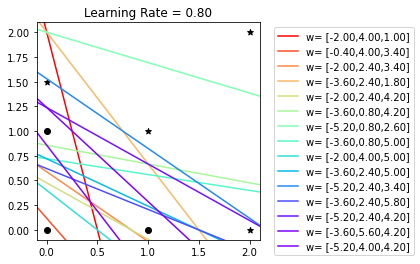

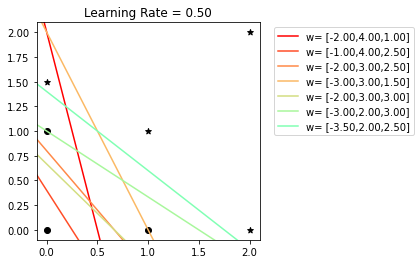

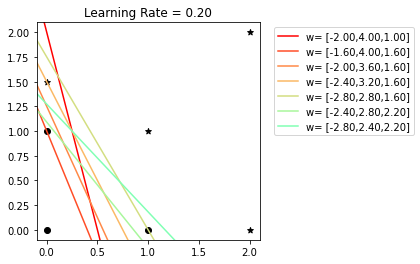

In [90]:
# re-load data
tilde_C = np.array([[1,0,1.5,1],[1,1,1,1],[1,2,2,1],[1,2,0,1],[1,0,0,-1],[1,1,0,-1],[1,0,1,-1]])
# initial weight
w0 = np.array([-2, 4, 1])

## update the weights + plot shifting lines
w_fit2a(w0, tilde_C[:,0:3], tilde_C[:,3], 0.8, 10)
w_fit2a(w0, tilde_C[:,0:3], tilde_C[:,3], 0.5, 10)
w_fit2a(w0, tilde_C[:,0:3], tilde_C[:,3], 0.2, 10)

We would like to determine the 'best' $\gamma$, which minimizes the distance from the hyperplane to the points. Using the least-squares error, we can compute the best hyperplane $w_{op}^T x = 0$, where 
	$$w_{op} = min_{w\in \mathbb{R}^{3\times 1}}\left\{ \frac{1}{7} \sum_{i=1}^7 (w \cdot x(i) - label(i))^2 \right\}. $$
We will use the Nelder-Mead solver to find $w_{op}$ and graph the hyperplane. 

Optimization terminated successfully.
         Current function value: 0.455424
         Iterations: 101
         Function evaluations: 180


Text(0.5, 1.0, 'Nelder-Mead optimal weight')

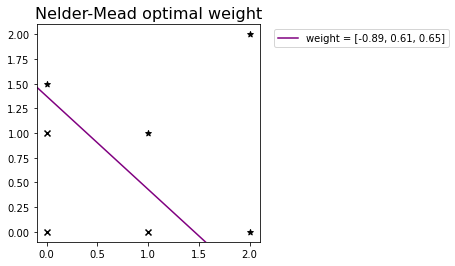

In [83]:
# Nelder-Mead
def least_squares(w):
    return (1/7)*np.sum(np.square(np.subtract(w @ tilde_C[:,0:3].T, tilde_C[:,3])))

best_w = minimize(least_squares, w0, method='nelder-mead',
               options={'disp': True})
#print(best_w.x)
# Note: scalars of best_w.x also work

# draw the best hyperplane
fig = plt.figure(figsize=(4,4))

plt.scatter(C[label==1,0],C[label==1,1],marker = "*",color = 'k')
plt.scatter(C[label==-1,0],C[label==-1,1],marker = "x",color ='k')

x = np.linspace(-0.1,2.1,100)
w = best_w.x
y = (-w[0] - w[1] * x)/w[2]
plt.plot(x, y, 'purple', label='weight = [-0.89, 0.61, 0.65]')
axes = plt.gca()
axes.set_ylim([-0.1,2.1])
axes.set_xlim([-0.1,2.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Nelder-Mead optimal weight', fontsize=16)

Using the Nelder-Mead solver, we find that $w_{op} = [-0.89, 0.61, 0.65]$ which gives a least-squares error of 0.455. Thus, the optimal $\gamma$ would be the one which realizes this weight in our Perceptron Learning Algorithm. 

However, as the following shows, for all $\gamma$ between 0 and 1 with initial weight $[−2, 4, 1]$, the optimal least-squares
error is never attained. Instead, the minimum least-squares is 3.61, and is attained when $\gamma$ = 0.33. Testing initial
weights of $w_{op}$, $w_0 = [-2,4,1]$ and $\frac{w_{op}+w_0}{2}$ we find that it becomes possible to attain the optimal hyperplane the closer our intitial weight gets to $w_{op}$.



0.4554242763037643
3.6094857142857126
0.33


Text(0.5, 1.0, 'Choosing best $\\gamma$')

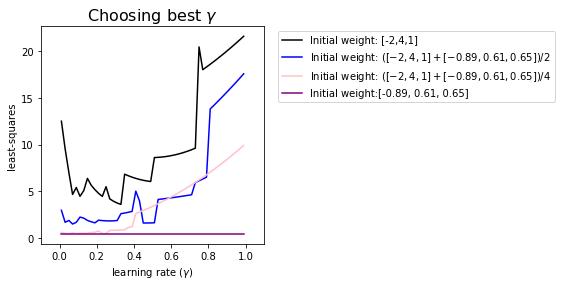

In [92]:
# best gamma?
w0 = np.array([-2, 4, 1])

g = np.linspace(0.01,0.99, 50)

squares = np.zeros([50,3])

for i in range(50):
    squares[i,0]= least_squares(w_fit3(w0, tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    squares[i,1] = least_squares(w_fit3(1/2*(best_w.x+w0), tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    squares[i,2] = least_squares(w_fit3(1/4*(best_w.x+w0), tilde_C[:,0:3], tilde_C[:,3], g[i] , 10))
    
fig = plt.figure(figsize=(4,4))

plt.plot(g, squares[:,0], '-k', label = 'Initial weight: [-2,4,1]')
plt.plot(g, squares[:,1], '-b', label = 'Initial weight: $([-2,4,1] + [-0.89, 0.61, 0.65])/2$')
plt.plot(g, squares[:,2], 'pink', label = 'Initial weight: $([-2,4,1] + [-0.89, 0.61, 0.65])/4$') 
plt.plot(g, least_squares(best_w.x)*np.ones([50,1]), 'purple', label = 'Initial weight:[-0.89, 0.61, 0.65]') 
axes = plt.gca()
axes.set_xlim([-0.1,1.1])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
axes.set_xlabel('learning rate ($\gamma$)')
axes.set_ylabel('least-squares error')
plt.title('Choosing best $\gamma$', fontsize = 16)